In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning.space import Integer, Real

import matplotlib.pyplot as plt
import seaborn as sns

## import Datasets

In [2]:
df = pd.read_csv("datasets/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# informasi dari datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

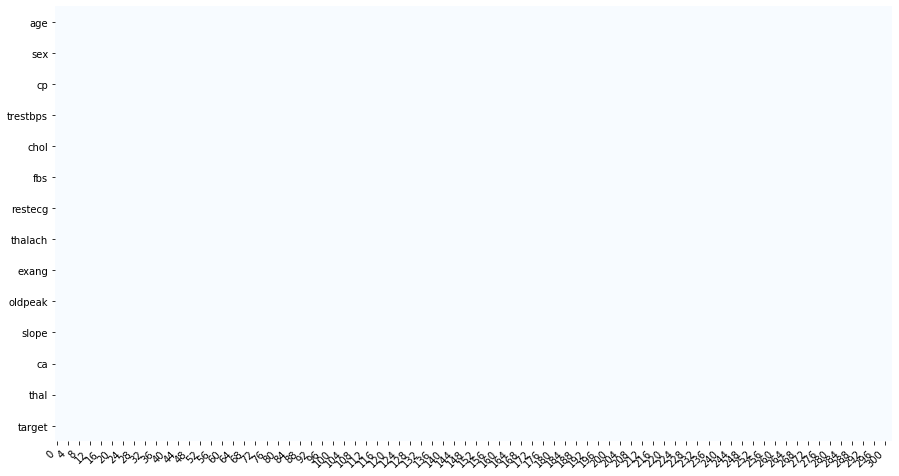

In [5]:
plot_missing_value(df)

## Visualize Data

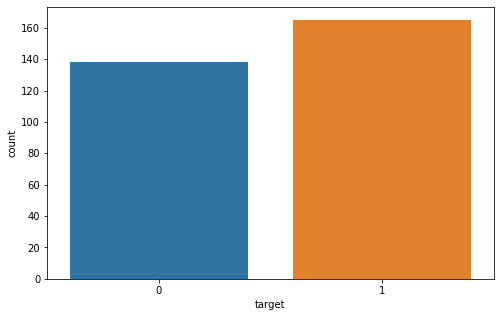

In [6]:
# Data Target
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df["target"])

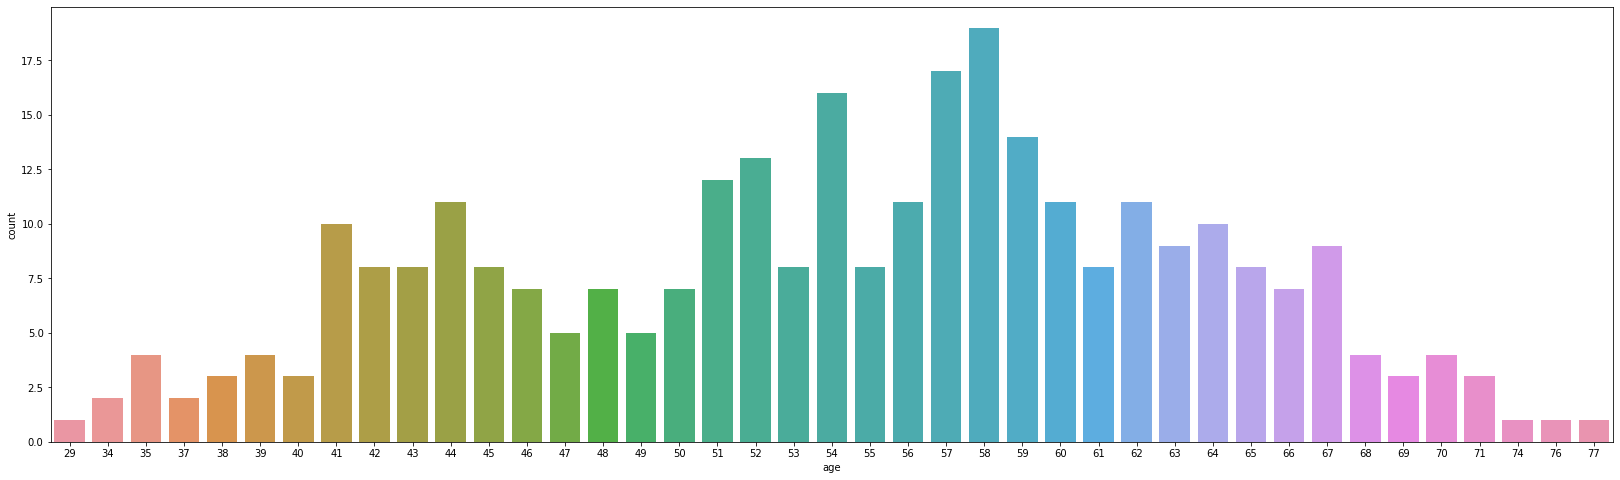

In [7]:
# Kolom Age
plt.figure(figsize=(28, 8))
ax = sns.countplot(x=df["age"])

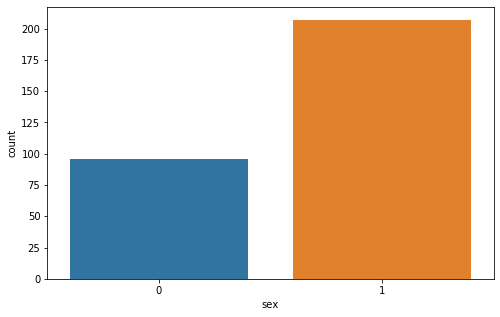

In [8]:
# Kolom Sex
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df["sex"])

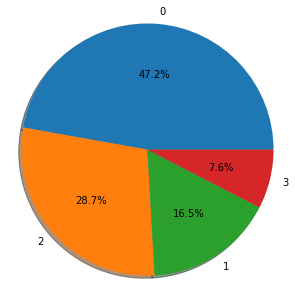

In [9]:
# Kolom cp
labels = '0', '2', '1', '3'
sizes = df["cp"].value_counts()

plt.figure(figsize=(5, 5))
ax = plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
plt.axis('equal')

plt.show()

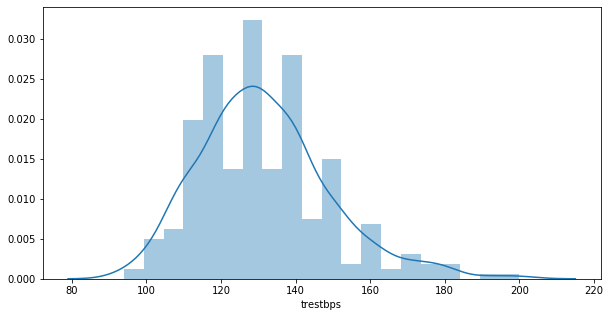

In [10]:
# Kolom trestbps
plt.figure(figsize=(10, 5))
ax = sns.distplot(df["trestbps"], bins=20)
plt.show()

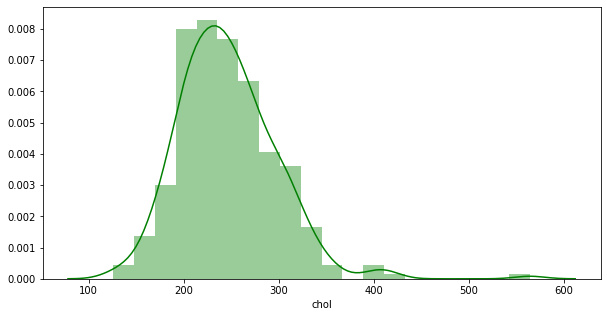

In [11]:
# Kolom chol
plt.figure(figsize=(10, 5))
ax = sns.distplot(df["chol"], bins=20, color='g')
plt.show()

0    258
1     45
Name: fbs, dtype: int64


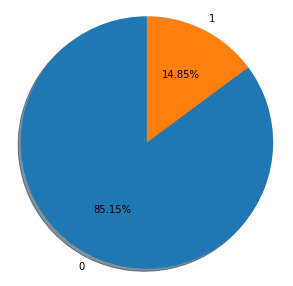

In [12]:
# Kolom fbs
print(df["fbs"].value_counts())

labels = '0', '1'
sizes = df["fbs"].value_counts()

plt.figure(figsize=(5, 5))
ax = plt.pie(sizes, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
plt.axis('equal')

plt.show()

1    152
0    147
2      4
Name: restecg, dtype: int64


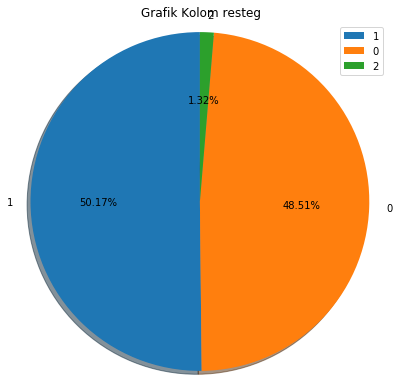

In [13]:
# kolom restecg
print(df["restecg"].value_counts())
label = ["1", "0", "2"]
data = df["restecg"].value_counts()

plt.figure(figsize=(5.5, 5.5))
ax = plt.pie(data, labels=label, shadow=True, startangle=90, autopct="%1.2f%%")
plt.title("Grafik Kolom resteg")
plt.tight_layout()
plt.legend()
plt.axis("equal")

plt.show()

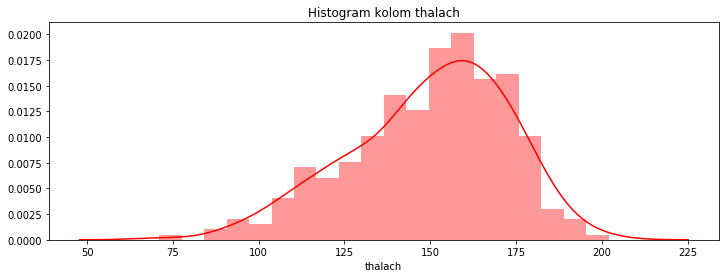

In [16]:
# Kolom thalach
plt.figure(figsize=(12, 4))
ax = sns.distplot(df["thalach"], bins=20, color='r')
plt.title("Histogram kolom thalach")

plt.show()

0    204
1     99
Name: exang, dtype: int64


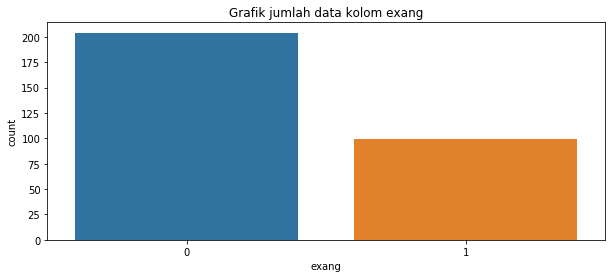

In [19]:
# Kolom exang
print(df["exang"].value_counts())

plt.figure(figsize=(10, 4))
ax = sns.countplot(df["exang"]) 
plt.title("Grafik jumlah data kolom exang")

plt.show()